In [1]:
import GPy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mix_integral_exponential import Mix_Integral_Exponential
from scipy.stats import norm

In [2]:
#X = 2.0*np.array([[1,0],[2,1],[3,2],[4,3],[10,9],[11,10],[12,11],[13,12]])
X = 2.0*np.array([[1,0],[2,1],[3,2],[4,3],[10,9],[11,10],[12,11],[13,12]])
X = np.c_[X,np.zeros([len(X),1])]
#X[:,1]+=1

#X = np.linspace(0,20,8)[:,None]
#X = np.c_[X,np.zeros([len(X),1])]
#X = np.c_[X,np.ones([len(X),1])]

Y = 10.0*np.array([[7,6,4,1,1,4,6,7]]).T
Y+=np.random.randn(len(Y),1)*0.1

kernel = Mix_Integral_Exponential(3,variances=531.0,lengthscale=[10.37])
m = GPy.models.GPRegression(X,Y,kernel)
testX = np.linspace(-5,30,500)[:,None]
testX = np.c_[testX,np.zeros([len(testX),1]),np.ones([len(testX),1])]
mu,var = m.predict_noiseless(testX)


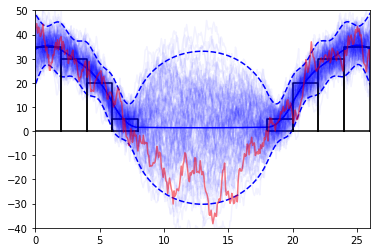

In [3]:
plt.plot(testX[:,0],mu,'b-')
plt.plot(testX[:,0],mu+np.sqrt(var)*1.96,'b--')
plt.plot(testX[:,0],mu-np.sqrt(var)*1.96,'b--')
for x,y in zip(X,Y):
    if x[-1]==0:
        
        plt.plot([x[0],x[1],x[1],x[0],x[0]],[0,0,y/np.abs(x[1]-x[0]),y/np.abs(x[1]-x[0]),0],'k-')
    else:
        plt.plot([x[0],x[0]],[-1,-2],'r-')
mu,K = m.predict_noiseless(testX,full_cov=True)        
sample = np.random.multivariate_normal(mu[:,0],K,size=100)        
plt.plot(testX[:,0],sample.T,'b-',alpha=0.05);
plt.plot(testX[:,0],sample[0:1,:].T,'r-',alpha=0.5);
plt.xlim([0,26])
plt.ylim([-40,50])
plt.savefig('exponential_kernel_demo.pdf')